In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

In [5]:
nrj_FRANCE = pd.read_csv(r'data/fr.csv', sep=',', header=0)

In [56]:
# Create dictionnary for months
month_dict = {
    1 : 'January',
    2 : 'February',
    3 : 'March',
    4 : 'April',
    5 : 'May',
    6 : 'June',
    7 : 'July',
    8 : 'August',
    9 : 'Spetember',
    10 : 'October',
    11 : 'November',
    12 : 'December'
}

In [6]:
nrj_FRANCE.head(10)

,start,end,load
0,2015-01-01 00:00:00+00:00,2015-01-01 01:00:00+00:00,70929.0
1,2015-01-01 01:00:00+00:00,2015-01-01 02:00:00+00:00,69773.0
2,2015-01-01 02:00:00+00:00,2015-01-01 03:00:00+00:00,66417.0
3,2015-01-01 03:00:00+00:00,2015-01-01 04:00:00+00:00,64182.0
4,2015-01-01 04:00:00+00:00,2015-01-01 05:00:00+00:00,63859.0
5,2015-01-01 05:00:00+00:00,2015-01-01 06:00:00+00:00,63921.0
6,2015-01-01 06:00:00+00:00,2015-01-01 07:00:00+00:00,64117.0
7,2015-01-01 07:00:00+00:00,2015-01-01 08:00:00+00:00,63861.0
8,2015-01-01 08:00:00+00:00,2015-01-01 09:00:00+00:00,64277.0
9,2015-01-01 09:00:00+00:00,2015-01-01 10:00:00+00:00,65100.0


In [9]:
nrj_FRANCE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48870 entries, 0 to 48869
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   start   48870 non-null  object 
 1   end     48870 non-null  object 
 2   load    48870 non-null  float64
dtypes: float64(1), object(2)
memory usage: 1.1+ MB


In [17]:
for i in ['start', 'end']:
    nrj_FRANCE[i] = pd.to_datetime(nrj_FRANCE[i])
print(nrj_FRANCE.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48870 entries, 0 to 48869
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   start   48870 non-null  datetime64[ns, UTC]
 1   end     48870 non-null  datetime64[ns, UTC]
 2   load    48870 non-null  float64            
dtypes: datetime64[ns, UTC](2), float64(1)
memory usage: 1.1 MB
None


In [28]:
nrj_FRANCE['Duration'] = nrj_FRANCE['end']-nrj_FRANCE['start']
print(nrj_FRANCE['Duration'].mean(), nrj_FRANCE['Duration'].median())
# All are equal to 1 hour

0 days 01:00:00 0 days 01:00:00


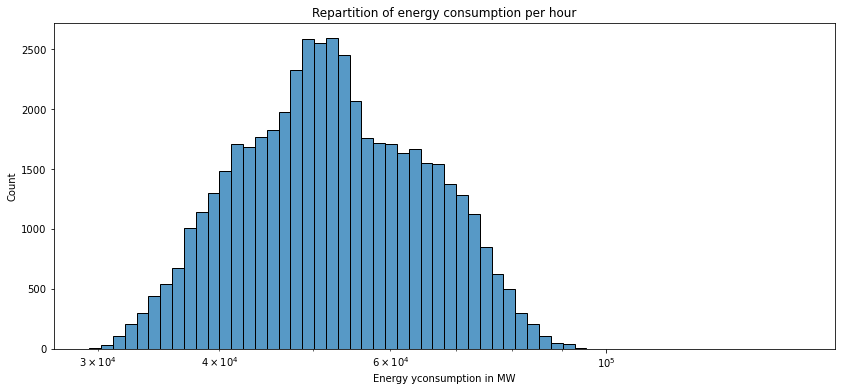

In [32]:
plt.figure(figsize=(14, 6))

sns.histplot(nrj_FRANCE, x='load', bins= 60, log_scale=True)
plt.title("Repartition of energy consumption per hour")
plt.xlabel('Energy yconsumption in MW')
plt.ylabel('Count')

plt.show()

In [66]:
# Sum over months 
# Define Month and Year depending on the Start time

nrj_FRANCE['day'] = pd.DatetimeIndex(nrj_FRANCE['start']).day
nrj_FRANCE['month'] = pd.DatetimeIndex(nrj_FRANCE['start']).month
nrj_FRANCE['year'] = pd.DatetimeIndex(nrj_FRANCE['start']).year

display(nrj_FRANCE.head(10))

,start,end,load,Duration,month,year,day
0,2015-01-01 00:00:00+00:00,2015-01-01 01:00:00+00:00,70929.0,0 days 01:00:00,1,2015,1
1,2015-01-01 01:00:00+00:00,2015-01-01 02:00:00+00:00,69773.0,0 days 01:00:00,1,2015,1
2,2015-01-01 02:00:00+00:00,2015-01-01 03:00:00+00:00,66417.0,0 days 01:00:00,1,2015,1
3,2015-01-01 03:00:00+00:00,2015-01-01 04:00:00+00:00,64182.0,0 days 01:00:00,1,2015,1
4,2015-01-01 04:00:00+00:00,2015-01-01 05:00:00+00:00,63859.0,0 days 01:00:00,1,2015,1
5,2015-01-01 05:00:00+00:00,2015-01-01 06:00:00+00:00,63921.0,0 days 01:00:00,1,2015,1
6,2015-01-01 06:00:00+00:00,2015-01-01 07:00:00+00:00,64117.0,0 days 01:00:00,1,2015,1
7,2015-01-01 07:00:00+00:00,2015-01-01 08:00:00+00:00,63861.0,0 days 01:00:00,1,2015,1
8,2015-01-01 08:00:00+00:00,2015-01-01 09:00:00+00:00,64277.0,0 days 01:00:00,1,2015,1
9,2015-01-01 09:00:00+00:00,2015-01-01 10:00:00+00:00,65100.0,0 days 01:00:00,1,2015,1


In [62]:
nrj_FRANCE_month = pd.DataFrame(nrj_FRANCE.groupby(['year', 'month']).sum())

nrj_FRANCE_month = nrj_FRANCE_month.reset_index()
nrj_FRANCE_month = nrj_FRANCE_month.pivot(index = 'month', columns = 'year', values='load')

display(nrj_FRANCE_month)

nrj_FRANCE_month.index = nrj_FRANCE_month.index.astype(int)

display(nrj_FRANCE_month.index)

nrj_FRANCE_month.index.rename(month_dict)
display(nrj_FRANCE_month)

year,2015,2016,2017,2018,2019,2020
month,,,,,,
1,51725199.0,49215126.0,56972849.0,47677046.0,53309882.0,48982627.0
2,47963647.0,45557783.0,42500793.0,49402028.0,43540349.0,42367373.0
3,45104582.0,46617335.0,42033655.0,47545979.0,42455425.0,40941968.0
4,36438366.0,38564314.0,36411014.0,35674724.0,37497012.0,30534897.0
5,33590317.0,34253383.0,34670087.0,33486745.0,35252223.0,30464502.0
6,32969829.0,32453840.0,33325754.0,32029026.0,32350412.0,30360224.0
7,34666370.0,33527240.0,33773638.0,34317609.0,34146521.0,32828106.0
8,31381232.0,31951701.0,31969347.0,31802033.0,31315448.0,NaN
9,33014999.0,33084516.0,33393101.0,32448346.0,32030576.0,NaN


Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='int64', name='month')

TypeError: Int64Index.name must be a hashable type

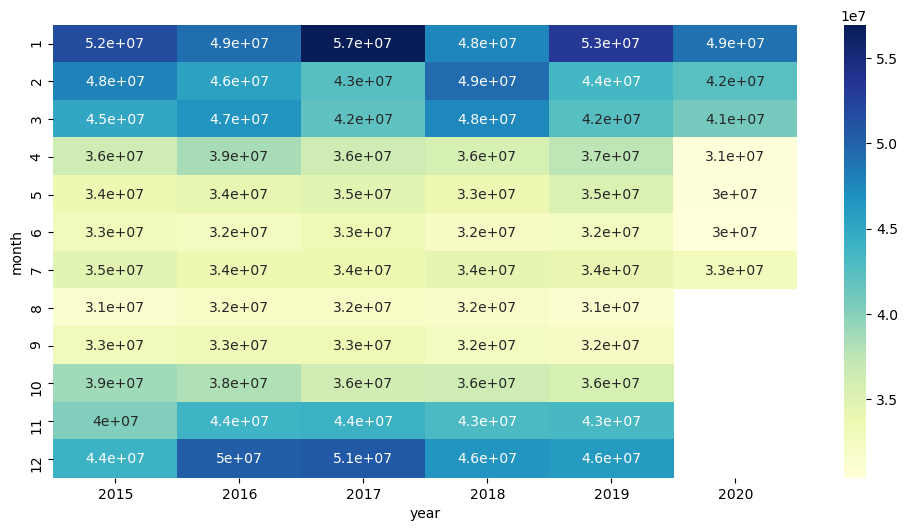

In [77]:
plt.figure(figsize=(12, 6), dpi=100)

sns.heatmap(nrj_FRANCE_month, annot=True, cmap="YlGnBu") # Inverse colors!

plt.show()

In [84]:
# Comparision for years 2020, 2019 and 2018

nrj_FRANCE_2020 = nrj_FRANCE[nrj_FRANCE['year']==2020]
nrj_FRANCE_2019 = nrj_FRANCE[nrj_FRANCE['year']==2019]
nrj_FRANCE_2018 = nrj_FRANCE[nrj_FRANCE['year']==2018]

In [85]:
nrj_FRANCE_2020_day = pd.DataFrame(nrj_FRANCE_2020[['load', 'month', 'day']].groupby(['month', 'day']).sum())
nrj_FRANCE_2020_day = nrj_FRANCE_2020_day.reset_index()
display(nrj_FRANCE_2020_day)

nrj_FRANCE_2019_day = pd.DataFrame(nrj_FRANCE_2019[['load', 'month', 'day']].groupby(['month', 'day']).sum())
nrj_FRANCE_2019_day = nrj_FRANCE_2019_day.reset_index()

nrj_FRANCE_2018_day = pd.DataFrame(nrj_FRANCE_2018[['load', 'month', 'day']].groupby(['month', 'day']).sum())
nrj_FRANCE_2018_day = nrj_FRANCE_2018_day.reset_index()

,month,day,load
0,1,1,1441716.0
1,1,2,1546926.0
2,1,3,1500839.0
3,1,4,1445840.0
4,1,5,1444781.0
...,...,...,...
208,7,27,1087608.0
209,7,28,1101361.0
210,7,29,1116157.0
211,7,30,1127456.0


In [86]:
nrj_FRANCE_2020_day = nrj_FRANCE_2020_day.pivot(index = 'month', columns = 'day', values='load')
nrj_FRANCE_2019_day = nrj_FRANCE_2019_day.pivot(index = 'month', columns = 'day', values='load')
nrj_FRANCE_2018_day = nrj_FRANCE_2018_day.pivot(index = 'month', columns = 'day', values='load')

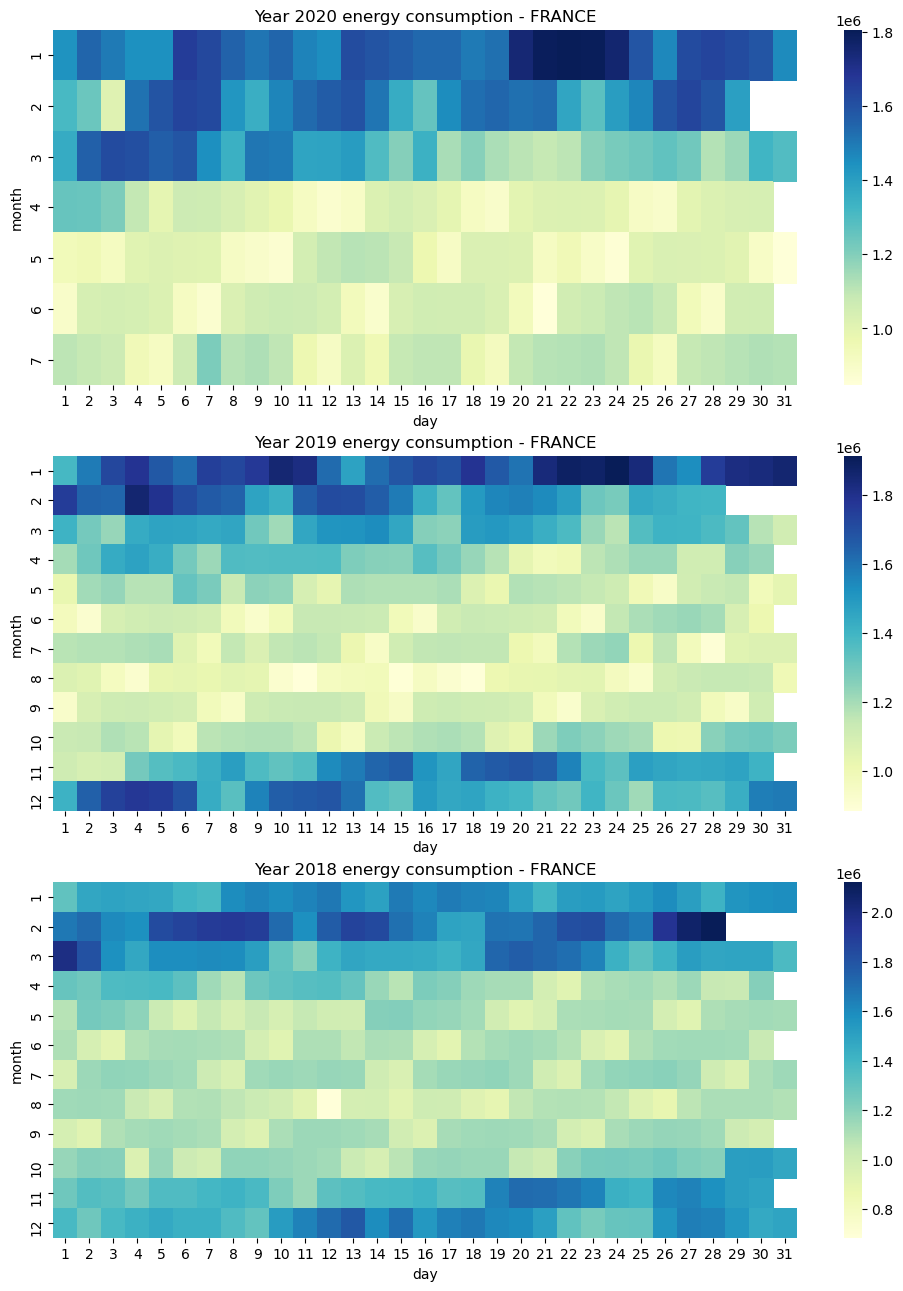

In [89]:
plt.figure(figsize=(12, 16), dpi=100)

plt.subplot(311)
sns.heatmap(nrj_FRANCE_2020_day, cmap="YlGnBu")
plt.title('Year 2020 energy consumption - FRANCE')

plt.subplot(312)
sns.heatmap(nrj_FRANCE_2019_day, cmap="YlGnBu")
plt.title("Year 2019 energy consumption - FRANCE")

plt.subplot(313)
sns.heatmap(nrj_FRANCE_2018_day, cmap="YlGnBu")
plt.title("Year 2018 energy consumption - FRANCE")

plt.show()

In [93]:
# Month energy consumption tendance
nrj_FRANCE_mth = pd.DataFrame(nrj_FRANCE[['year', 'month', 'load']].groupby(['year', 'month']).sum()).reset_index()
display(nrj_FRANCE_mth)

,year,month,load
0,2015,1,51725199.0
1,2015,2,47963647.0
2,2015,3,45104582.0
3,2015,4,36438366.0
4,2015,5,33590317.0
...,...,...,...
62,2020,3,40941968.0
63,2020,4,30534897.0
64,2020,5,30464502.0
65,2020,6,30360224.0


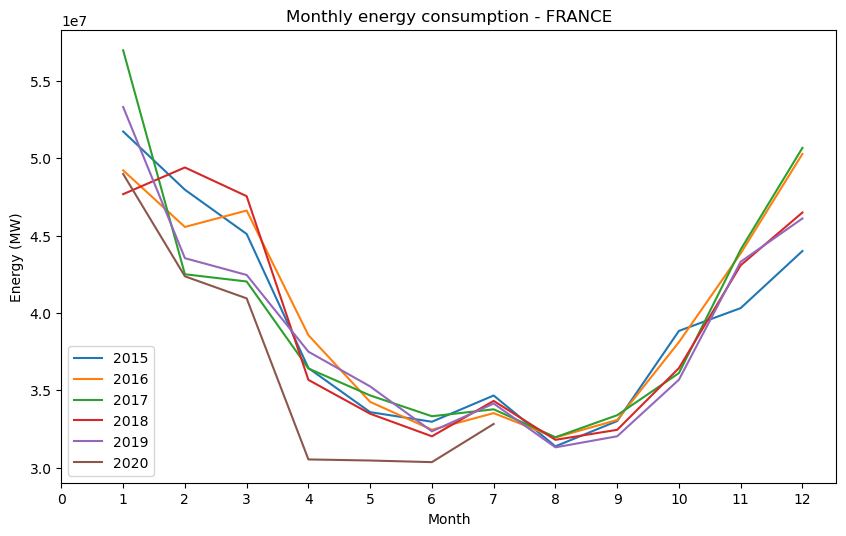

In [98]:
years = [2015, 2016, 2017, 2018, 2019, 2020]

plt.figure(figsize=(10, 6), dpi=100)
for y in years:
    data_plt = nrj_FRANCE_mth[nrj_FRANCE_mth['year']==y]
    plt.plot(data_plt['month'], data_plt['load'], label=str(y))

plt.title("Monthly energy consumption - FRANCE")
plt.xticks(range(13))
plt.xlabel("Month")
plt.ylabel("Energy (MW)")

plt.legend()
plt.show()

In [99]:
# Daily energy consumption tendance (sum over months for each year)

def get_week_day(x):
    return x.strftime('%a')

nrj_FRANCE['week_day'] = nrj_FRANCE['start'].apply(lambda x : get_week_day(x))

display(nrj_FRANCE.sample(10))

,start,end,load,Duration,month,year,day,week_day
34772,2018-12-21 16:00:00+00:00,2018-12-21 17:00:00+00:00,64769.0,0 days 01:00:00,12,2018,21,Fri
19984,2017-04-13 14:00:00+00:00,2017-04-13 15:00:00+00:00,50690.0,0 days 01:00:00,4,2017,13,Thu
6543,2015-09-30 16:00:00+00:00,2015-09-30 17:00:00+00:00,50087.0,0 days 01:00:00,9,2015,30,Wed
24142,2017-10-03 22:00:00+00:00,2017-10-03 23:00:00+00:00,46752.0,0 days 01:00:00,10,2017,3,Tue
29504,2018-05-15 12:00:00+00:00,2018-05-15 13:00:00+00:00,54549.0,0 days 01:00:00,5,2018,15,Tue
34083,2018-11-22 20:00:00+00:00,2018-11-22 21:00:00+00:00,66853.0,0 days 01:00:00,11,2018,22,Thu
25515,2017-11-30 05:00:00+00:00,2017-11-30 06:00:00+00:00,70706.0,0 days 01:00:00,11,2017,30,Thu
10873,2016-03-29 03:00:00+00:00,2016-03-29 04:00:00+00:00,51344.0,0 days 01:00:00,3,2016,29,Tue
24919,2017-11-05 08:00:00+00:00,2017-11-05 09:00:00+00:00,47738.0,0 days 01:00:00,11,2017,5,Sun
27274,2018-02-11 12:00:00+00:00,2018-02-11 13:00:00+00:00,67213.0,0 days 01:00:00,2,2018,11,Sun


In [104]:
nrj_FRANCE_day = pd.DataFrame(nrj_FRANCE[['load', 'year', 'week_day']].groupby(['year', 'week_day']).sum()).reset_index()
nrj_FRANCE_day = nrj_FRANCE_day[nrj_FRANCE_day['year']!=2020] # Remove 2020 since incomplete year (not relevant)
display(nrj_FRANCE_day)


,year,week_day,load
0,2015,Fri,69047057.0
1,2015,Mon,68300501.0
2,2015,Sat,62530821.0
3,2015,Sun,59370217.0
4,2015,Thu,71477313.0
5,2015,Tue,69563292.0
6,2015,Wed,69723716.0
7,2016,Fri,71480819.0
8,2016,Mon,68744371.0
9,2016,Sat,64795228.0


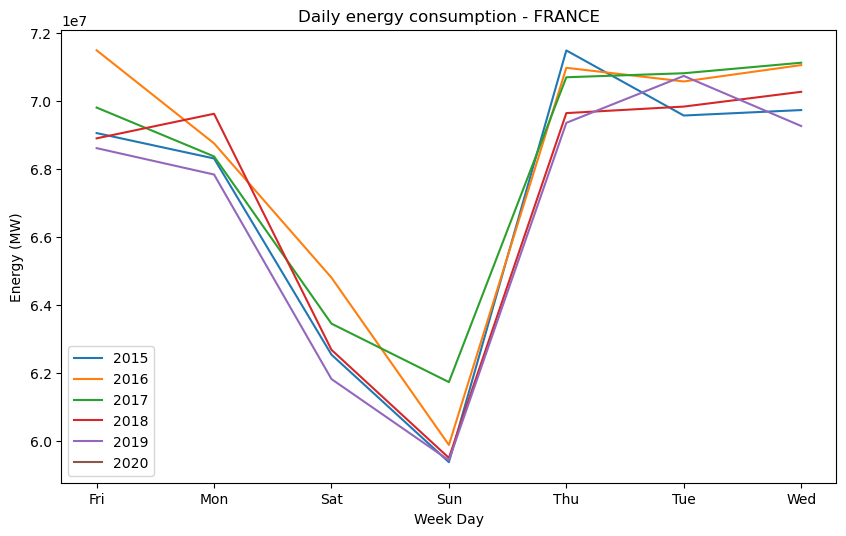

In [105]:
plt.figure(figsize=(10, 6), dpi=100)
for y in years:
    data_plt = nrj_FRANCE_day[nrj_FRANCE_day['year']==y]
    plt.plot(data_plt['week_day'], data_plt['load'], label=str(y))

plt.title("Daily energy consumption - FRANCE")
plt.xlabel("Week Day")
plt.ylabel("Energy (MW)")

plt.legend()
plt.show()

# Re-order weekday!!

In [ ]:
# Compare MARCH centered on Monday - Tuesday ... for all years
